In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.transform import radon, iradon
from skimage.draw import ellipse

In [2]:
# Intensidad. I ∈ [-1; 1]
I = 1

# Inclinación
A = 0

# Semi-eje X. X ∈ (0; 1]
X = 0

# Semi-eje Y. Y ∈ (0; 1]
Y = 0

# Centro X. CX ∈ [-1; 1]
CX = 0

# Centro Y. CY ∈ [-1; 1]
CY = 0

In [3]:
image = imread("test_phantom.png", as_gray=True)

In [4]:
def new_phantom() -> np.ndarray:
   phantom = np.zeros((250, 250))
   return phantom

In [5]:
def add_elipse(
    phantom: np.ndarray,
    I: int,
    A: int,
    X: int,
    Y: int,
    CX: int,
    CY: int
) -> np.ndarray:
    
    rad_A = A*np.pi/180
    
    scaled_X = (X * phantom.shape[1])/2
    scaled_Y = (Y * phantom.shape[0])/2

    scaled_CX = (CX * phantom.shape[1]/2) + phantom.shape[1]/2
    scaled_CY = phantom.shape[0] - ((CY * phantom.shape[0]/2) + phantom.shape[0]/2)
    
    rr, cc = ellipse(r=scaled_CY, c=scaled_CX, r_radius=scaled_Y, c_radius=scaled_X, rotation=rad_A, shape=phantom.shape)
    phantom[rr, cc] = I
    return phantom

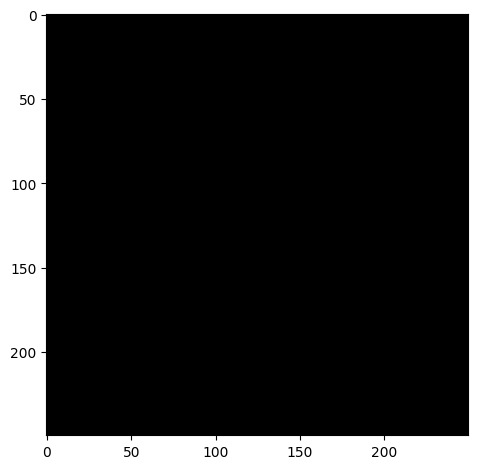

In [6]:
phantom = new_phantom()
imshow(phantom)

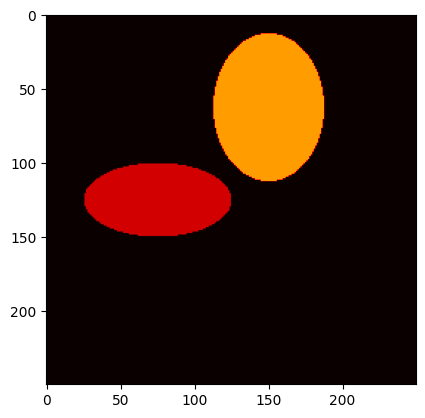

In [7]:
phantom = add_elipse(phantom, .3, 90, X=0.2, Y=0.4, CX=-0.4, CY=0)
phantom = add_elipse(phantom, .6, 0, X=0.3, Y=0.4, CX=0.2, CY=0.5)
plt.imshow(phantom, cmap=plt.get_cmap("hot"), vmax=1, vmin=0)

In [8]:
def make_sinogram(phantom: np.ndarray, start: int, step: int, end: int) -> tuple[np.ndarray, np.ndarray]:
    theta = list(range(start, end+1, step))
    sinogram = radon(phantom, theta)
    return sinogram, theta

In [9]:
def plot_sinogram(sinogram: np.ndarray, theta: np.ndarray):
    return plt.imshow(
        sinogram,
        cmap=plt.cm.get_cmap("hot"),
        aspect='auto',
        extent=[theta[0], theta[-1], 125, -125]
    )

In [10]:
sinogram, theta = make_sinogram(phantom, start=0, step=1, end=180)

/tmp/ipykernel_11536/25905842.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap("hot"),


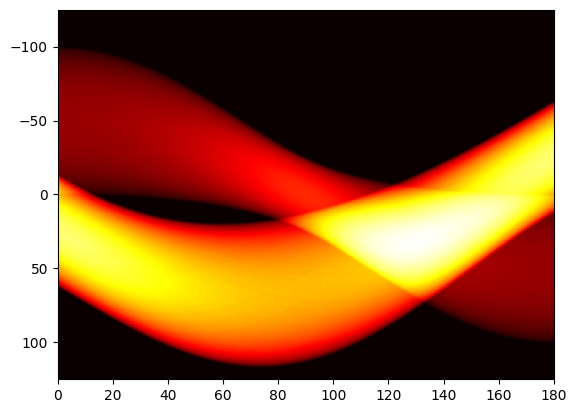

In [11]:
plot_sinogram(sinogram, theta)

In [12]:
iphantom = iradon(sinogram, 
                  theta, 
                  phantom.shape[0], 
                  interpolation="nearest",
                  filter_name="ramp")

/tmp/ipykernel_11536/291078429.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap("hot"),


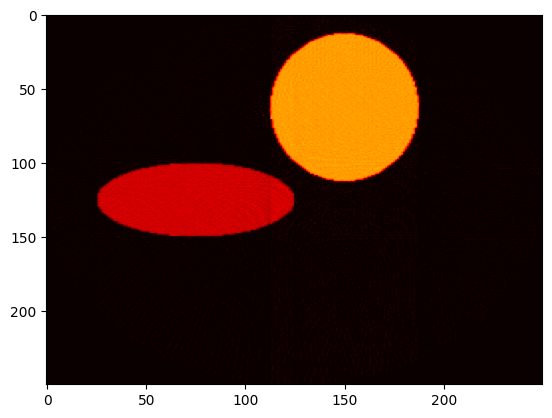

In [13]:
plt.imshow(
    iphantom,
    cmap=plt.cm.get_cmap("hot"),
    aspect='auto',
    vmin=0,
    vmax=1
)